In [1]:
import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
%matplotlib inline

In [2]:
def build_toffoli_init():
    circ = QuantumCircuit(3)
    # start init
    circ.h(0) 
    circ.h(1) 
    theta = Parameter('theta')
    circ.rx(theta, 2)
    circ.barrier()
    # end of init
    circ.h(2)
    circ.cx(1, 2)
    circ.tdg(2)
    circ.cx(0, 2)
    circ.t(2)
    circ.cx(1, 2)
    circ.tdg(2)
    circ.cx(0, 2)
    circ.tdg(1)
    circ.t(2)
    circ.cx(0, 1)
    circ.h(2)
    circ.tdg(1)
    circ.cx(0, 1)
    circ.t(0)
    circ.s(1)
    circ.measure_all()
    circs = [circ.bind_parameters({theta: theta_val}) for theta_val in [0, np.pi]]
    return circs

In [3]:
circs = build_toffoli_init()

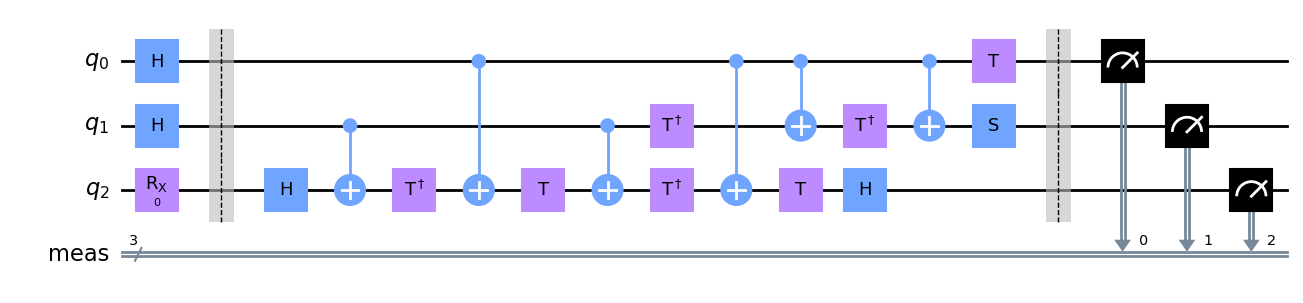

In [4]:
circs[0].draw('mpl')

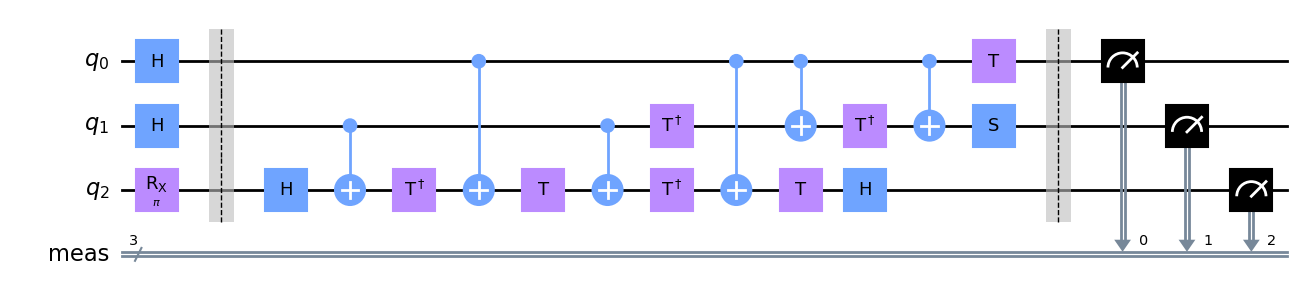

In [5]:
circs[1].draw('mpl')

In [6]:
c=[]
for circ in circs:
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circ, simulator, shots=100000).result()
    counts = result.get_counts(circ)
    c.append(counts)

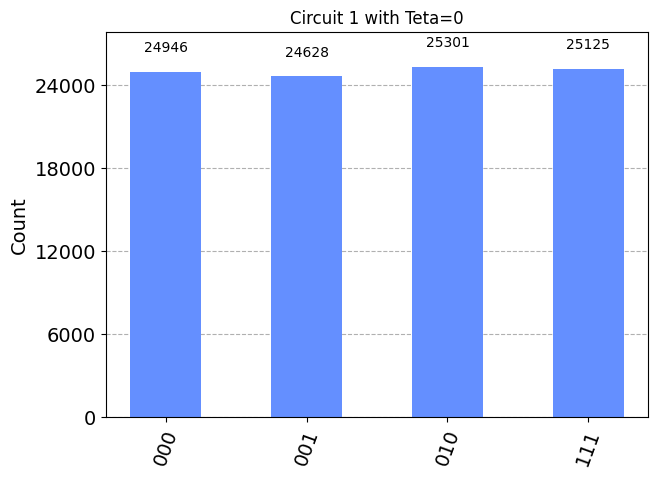

In [7]:
plot_histogram(c[0],title="Circuit 1 with Teta=0")

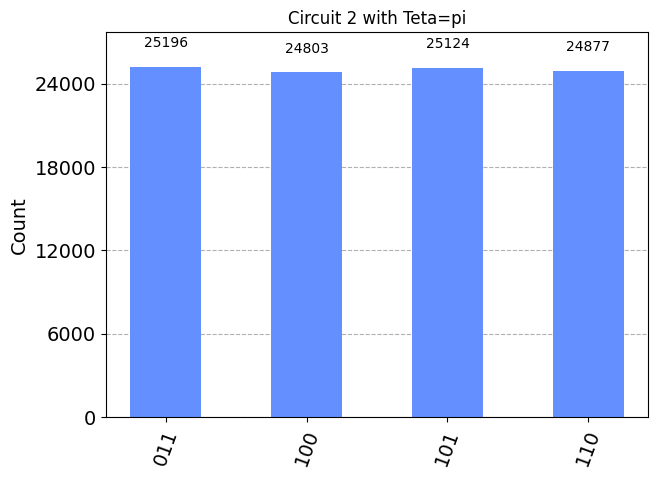

In [8]:
plot_histogram(c[1],title="Circuit 2 with Teta=pi")